In [1]:
import pandas as pd
import numpy as np

import boto3
import io

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


# Set the maximum number of rows and Columns to 200
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

In [2]:
# Create function to load s3 files from AWS
def load_s3_file(file_name, s3, bucket_name, df_name):
    # Downloading the file from S3 and parsing it into a dataframe
    s3.download_file(bucket_name, file_name, file_name)
    
    # Low memory is set to False because columns have mixed data types
    df_name = pd.read_csv(file_name, index_col=False, low_memory=False)
    return df_name 

In [4]:
# Load files from AWS
s3R = boto3.resource("s3")
s3 = boto3.client("s3")
bucket_name = "capstonehaystacks"

# Listing the contents of the S3 bucket
for obj in s3R.Bucket(bucket_name).objects.all():
    print(obj.key)

ACSDP5Y2021.DP04-Data.csv
ACSST5Y2021.S0101-Data.csv
ACSST5Y2021.S0801-Data.csv
ACSST5Y2021.S1901-Data.csv
GA_LISTINGS_SALES.csv
GA_LISTINGS_SALES_V2.csv
GA_listing.csv
POI_second_tab.csv
all_zips_grocery_store.json
all_zips_restaurant.json
atlanta-geo.csv
atlanta_cbsa_zip.csv
atlanta_hdma_2021.csv
atlanta_hdma_census_2021.csv
atlanta_hdma_tract_2021.csv
atlanta_listings.csv
census_all.csv
census_all_perCapita.csv
census_data
core_geo_dataset.csv
crime.csv
crime_rating_zipcode.csv
elementary_schools.csv
ga_georgia_zip_codes_geo.min.json
high_schools.csv
hmda_2017_ga_all-records_labels.csv
hmda_2021_ga_all-records_labels.csv
jason_listing.csv
listing-with-poi-distances.csv
listings_with_tract.csv
middle_schools.csv
poi-google-exploded.csv
poi_combined_haystack.csv
poi_combined_haystack_ALL.csv
poi_combined_haystack_ALL_CLEANED.csv
poi_expanded.csv
points-of-interest-google.csv
points-of-interest-google2.csv
points-of-interest-google3.csv
points-of-interest-haystacks.csv
schools.csv
zip_

In [5]:
# Load S3 files to variables
census = load_s3_file("census_all.csv", s3, bucket_name, df_name="census")
census_capita = load_s3_file("census_all_perCapita.csv", s3, bucket_name, df_name="census_capita")
hdma = load_s3_file("atlanta_hdma_2021.csv", s3, bucket_name, df_name="hdma")

In [6]:
census

,zipcode,total_workers,car_commute,travel_less_10,travel_10_14,travel_15_19,travel_20_24,travel_25_29,travel_30_34,travel_35_44,travel_45_59,travel_more_60,travel_mean,population,percent_male,percent_under_15,percent_teen_15_19,percent_college_20_24,percent_25_39,percent_40-59,percent_over_60,total_units,rental_vacancy_rate,median_homeowner_value,median_rental_value,percent_owner_occupied,percent_after_2019,rent_less_15_percent_income,rent_over_30_percent,rent_15_30_percent,rent_less_999,rent_1000_2500,rent_over_2500,gross_rental_yield,total_households,percent_less_10k,percent_10k_15k,percent_15k_25k,percent_25k_35k,percent_35k_50k,percent_50k_75k,percent_75k_100k,percent_100k_150k,percent_150k_200k,percent_more_200k,household_median_income,household_mean_income,approval_percentage
0,30002,3221,77.1,5.1,9.6,14.1,15.7,3.6,24.0,10.2,8.8,8.9,29.7,6025,49.0,19.4,1.6,2.1,25.4,27.6,24.1,3149,7.0,432400.0,933.0,56.5,21.0,12.4,64.2,23.5,72.5,26.7,0.8,2.589269,2810,2.1,9.3,6.7,13.5,5.2,10.7,12.8,15.1,11.5,13.2,79091.0,114933.0,87.51
1,30004,34618,75.4,10.6,11.9,14.7,15.3,3.1,9.8,7.9,12.8,13.7,29.9,66315,49.0,22.3,7.3,2.7,18.2,35.3,14.1,24391,4.5,444200.0,1478.0,76.4,10.3,9.7,36.7,53.5,7.9,85.0,7.0,3.992796,23933,3.0,1.6,2.8,2.6,6.6,8.2,14.1,17.9,13.6,29.6,129724.0,176246.0,90.60
2,30005,21241,71.2,8.8,15.0,13.6,16.9,4.2,11.1,6.6,10.5,13.3,28.7,40309,51.0,22.1,8.2,4.0,16.9,34.1,14.7,14248,8.8,464100.0,1712.0,71.9,11.8,17.4,36.3,46.2,1.1,91.3,7.6,4.426632,13498,1.7,1.2,2.4,1.8,4.2,7.7,9.4,21.2,13.9,36.6,152326.0,181245.0,91.29
3,30008,15093,83.3,5.6,6.0,13.6,20.3,4.9,22.8,7.9,9.0,10.0,30.5,35023,49.0,21.3,6.1,8.0,23.7,25.8,15.2,12420,2.0,200700.0,1195.0,60.2,8.8,7.5,63.2,29.3,32.7,67.4,0.0,7.144993,11648,6.5,3.3,9.1,9.6,11.2,20.2,12.0,18.3,7.1,2.6,60739.0,74072.0,85.11
4,30009,10425,65.5,14.7,16.1,16.4,12.7,4.3,8.9,2.9,12.2,11.8,27.0,19922,52.0,20.3,5.0,7.0,16.8,30.8,20.1,8278,7.1,456300.0,1764.0,63.7,19.3,14.0,40.3,45.7,10.4,66.1,23.5,4.639053,7563,1.8,2.3,4.6,4.6,8.0,8.9,9.6,15.2,14.7,30.3,136384.0,178231.0,90.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,31085,445,88.8,9.7,7.0,3.8,10.6,3.2,22.2,5.7,6.6,31.2,43.1,1150,51.0,9.0,6.0,3.7,14.3,29.4,37.5,455,0.0,81800.0,943.0,91.3,1.4,0.0,96.8,3.2,100.0,0.0,0.0,13.833741,414,14.7,2.7,3.1,22.9,12.3,8.0,13.0,15.7,1.9,5.6,37500.0,68342.0,85.89
203,31097,519,94.6,11.2,6.4,19.5,24.9,2.4,13.7,2.2,12.7,7.0,28.1,1437,50.0,18.3,3.8,9.0,14.8,22.5,31.5,613,0.0,146900.0,663.0,86.4,2.5,61.1,30.5,8.4,88.9,5.6,5.6,5.415929,478,3.1,1.7,7.5,5.0,10.3,36.8,17.4,11.7,3.1,3.3,59275.0,74733.0,82.16
204,31816,1846,89.8,25.8,14.5,5.2,2.8,2.6,5.9,16.4,18.9,7.7,30.7,4956,44.0,22.2,11.7,3.4,16.7,23.0,23.0,2577,0.0,110700.0,833.0,58.3,7.5,16.3,65.8,18.0,87.8,12.1,0.0,9.029810,2066,15.4,6.1,11.7,10.3,18.9,14.0,11.7,9.1,1.0,1.7,37280.0,54382.0,75.15
205,31822,2502,91.8,11.6,9.4,10.2,13.7,7.4,24.5,4.5,10.3,8.4,28.4,5899,49.0,16.6,6.1,4.9,17.4,24.0,31.0,2756,1.8,165900.0,794.0,79.2,6.6,18.8,39.6,41.7,88.0,8.7,3.3,5.743219,2316,9.0,4.7,10.0,9.6,16.3,14.6,9.6,18.0,1.2,6.9,52813.0,76390.0,81.78


In [81]:
census.columns.get_loc('percent_more_200k')

44

In [82]:
census.iloc[:,35:45].columns

Index(['percent_less_10k', 'percent_10k_15k', 'percent_15k_25k',
       'percent_25k_35k', 'percent_35k_50k', 'percent_50k_75k',
       'percent_75k_100k', 'percent_100k_150k', 'percent_150k_200k',
       'percent_more_200k'],
      dtype='object')

In [32]:
census.iloc[:10,15:21].values

array([[19.4,  1.6,  2.1, 25.4, 27.6, 24.1],
       [22.3,  7.3,  2.7, 18.2, 35.3, 14.1],
       [22.1,  8.2,  4. , 16.9, 34.1, 14.7],
       [21.3,  6.1,  8. , 23.7, 25.8, 15.2],
       [20.3,  5. ,  7. , 16.8, 30.8, 20.1],
       [22.5,  7.9,  6.3, 21.7, 27.1, 14.5],
       [20.5,  8.5,  7.3, 19.5, 25.3, 18.9],
       [18.7,  6.3,  5.6, 20. , 29.3, 20. ],
       [20.4,  7.2,  6.7, 20.2, 25.3, 20.1],
       [21.4,  8.6,  6.6, 20.1, 27.1, 16.2]])

In [27]:
x = census.iloc[:, 15:21].columns.tolist()
height = census.iloc[:, 15:21].values

In [28]:
x

['percent_under_15',
 'percent_teen_15_19',
 'percent_college_20_24',
 'percent_25_39',
 'percent_40-59',
 'percent_over_60']

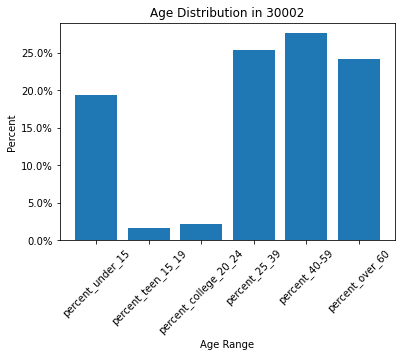

In [72]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

zipcode = 30002
age_col_i_start = 15
age_col_i_end = 21

x = census.iloc[:, age_col_i_start:age_col_i_end].columns
height = census[census['zipcode'] == zipcode].iloc[:, age_col_i_start:age_col_i_end].values[0]
height = height /100

# Plotting the bar chart
plt.bar(x, height)

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('% of Population')
plt.title(f'Age Distribution in {zipcode}')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Formatting y-axis labels as percentages
formatter = ticker.PercentFormatter(xmax=1)
plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


In [ ]:
census.iloc[:,35:45]

In [78]:
import plotly.graph_objects as go

zipcode = 30002
age_col_i_start = 15
age_col_i_end = 21

x = census.iloc[:, age_col_i_start:age_col_i_end].columns
height = census[census['zipcode'] == zipcode].iloc[:, age_col_i_start:age_col_i_end].values[0]
height = height / 100.0  # Dividing by 100 to convert to decimal

# Creating the bar trace
trace = go.Bar(
    x=x,
    y=height,
)

# Creating the layout
layout = go.Layout(
    title=dict(text=f"Age Distribution in {zipcode}"),
    xaxis=dict(title='Age Range'),
    yaxis=dict(title='Percent', tickformat='.0%', tickangle=45)
)

# Creating the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
fig.show()

In [ ]:
import plotly.graph_objects as go

zipcode = 30002
age_col_i_start = 15
age_col_i_end = 21

x = census.iloc[:, age_col_i_start:age_col_i_end].columns
height = census[census['zipcode'] == zipcode].iloc[:, age_col_i_start:age_col_i_end].values[0]
height = height / 100.0  # Dividing by 100 to convert to decimal

# Creating the bar trace
trace = go.Bar(
    x=x,
    y=height,
)

# Creating the layout
layout = go.Layout(
    title=dict(text=f"Age Distribution in {zipcode}"),
    xaxis=dict(title='Age Range'),
    yaxis=dict(title='Percent', tickformat='.0%', tickangle=45)
)

# Creating the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
fig.show()